Input Data and Shape
(3000, 2)


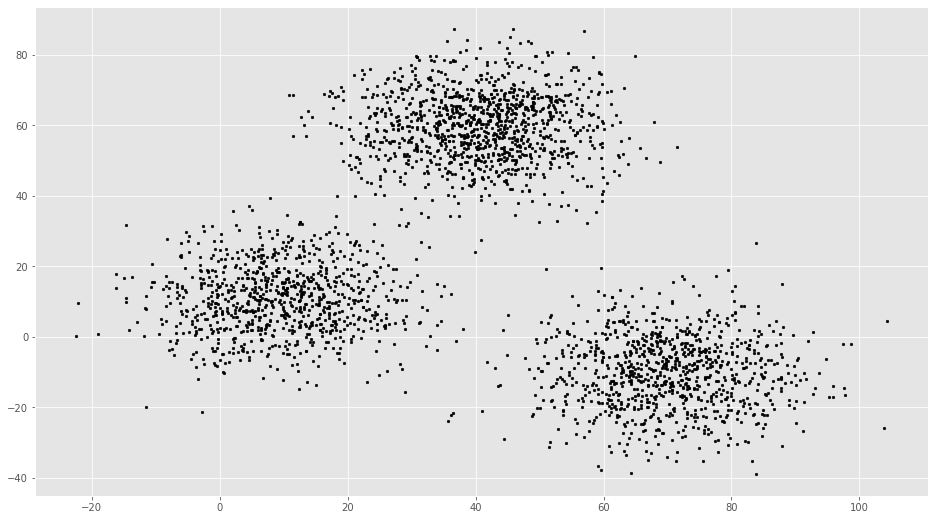

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
# Importing the dataset
data = pd.read_csv("./xclara.csv")
print("Input Data and Shape")
print(data.shape)
data.head()

# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)
# print(X)


[[0.43251167 0.01962674 0.1711759 ]
 [0.42939331 0.36556136 0.24533684]
 [0.69996513 0.25012041 0.19251247]
 ...
 [0.2027377  0.72814432 0.03591371]
 [0.08863009 0.89514341 0.46725969]
 [0.75340599 0.30950491 0.66675161]]
[[0.69389016 0.03148772 0.27462212]
 [0.41276249 0.35140281 0.23583471]
 [0.61260839 0.21890499 0.16848661]
 ...
 [0.20970065 0.75315219 0.03714716]
 [0.06108067 0.61690071 0.32201861]
 [0.43557976 0.17893948 0.38548076]]
[[0.04060651 0.91171998 0.0476735 ]
 [0.03805831 0.93422101 0.02772068]
 [0.01740353 0.96767776 0.01491871]
 ...
 [0.00586792 0.00929862 0.98483346]
 [0.04944354 0.05330354 0.89725292]
 [0.02867646 0.05130588 0.92001766]]
[[ 40.8287936   60.04126276]
 [  9.28350664  10.66020489]
 [ 70.20173312 -10.23235529]]


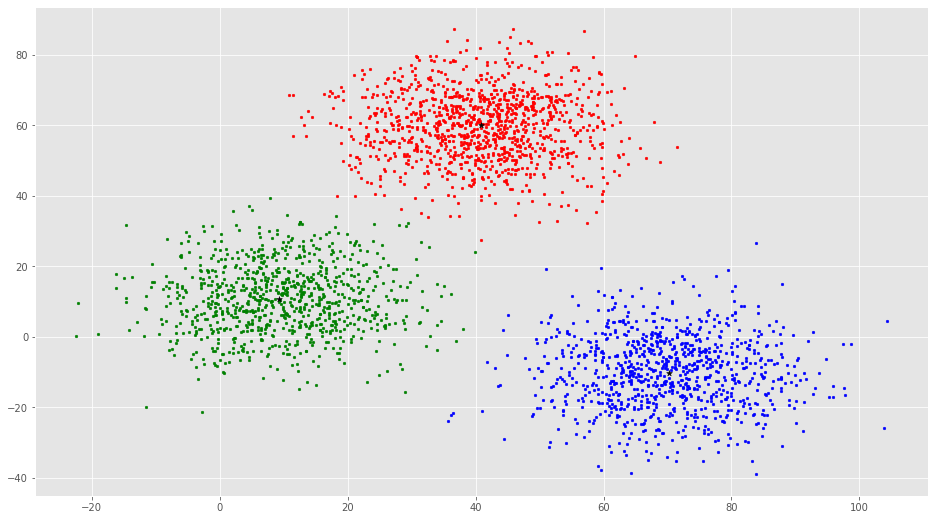

In [13]:
m = 2
EPS = 1e-7

def distance(X, centroid):
    return np.sqrt(np.sum((X-centroid)**2, axis=1))

sampleNumber = X.shape[0]  # 样本数
classes = 3

U = np.random.rand(sampleNumber, classes)
print(U)
sumU = 1 / np.sum(U,axis=1)
U = np.multiply(U.T,sumU)     #np.multiply()数组对应位置相乘
U = U.T
print(U)

U_old = np.zeros((sampleNumber, classes))
while np.max(np.abs(U-U_old))>EPS:
    centroids = []
    for i in range(classes):
        centroid = np.dot(U[:, i]**m, X) / (np.sum(U[:, i]**m))
        centroids.append(centroid)
    U_old = U.copy()
    U = np.zeros((sampleNumber, classes))
    for i in range(classes):
        for k in range(classes):
            U[:, i] += (distance(X, centroids[i]) / distance(X, centroids[k])) ** (2 / (m - 1))
    U = 1 / U
print(U)
Uc = np.argmax(U,axis=1)
centroids = np.array(centroids)
print(centroids)
c_x = centroids[:,0]
c_y = centroids[:,1]
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
colors = ['r', 'g', 'b', 'y', 'c', 'm']
# for i in range(len(Uc)):
#     # plt.scatter(x[i],y[i],c=('green' if Uc[i]==0 else 'blue' if Uc[i]==1 else 'magenta'),alpha=0.5)
#     plt.scatter(x[i],y[i],c=colors[Uc[i]])
# plt.scatter(c_x,c_y,marker='*',c='black')

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(classes):
    points = np.array([X[j] for j in range(len(X)) if Uc[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(c_x,c_y,marker='*',c='black')